In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dulieuxettuyendaihoc.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')

In [3]:
df = df[['T5','T6','NGONNGU',
         'TOANLOGICPHANTICH','GIAIQUYETVANDE']]

In [4]:
df.rename(columns={'TOANLOGICPHANTICH':'LOGIC',
                   'GIAIQUYETVANDE':'UNGXU'}, 
                   inplace=True)

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model 
X=df[['T5','T6']].values
y=df['NGONNGU'].values
X=X.astype(float)
y=y.astype(float)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, 
                                                    random_state=16)

In [6]:

from sklearn import linear_model 

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)

4.012050047743211
[ 0.19517246 -0.23194661]


In [7]:
#Tính toán các MAE, MSE,RMSE trên các tập training và test để đánh giá. Sau đó,đưa ra kết luận
import numpy as np
from sklearn import metrics
y_test_pred=model.predict(X_test)
print('Score or R-squared: ',model.score(X_test,y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_test_pred)) 
#Score là số âm thì mô hình này không dùng được

Score or R-squared:  -0.07691460875153755
Mean Absolute Error: 1.1905472933346886
Mean Squared Error: 1.987412256869439
Root Mean Squared Error: 1.4097560983622093
Mean Absolute percentage Error: 0.3812386409968104


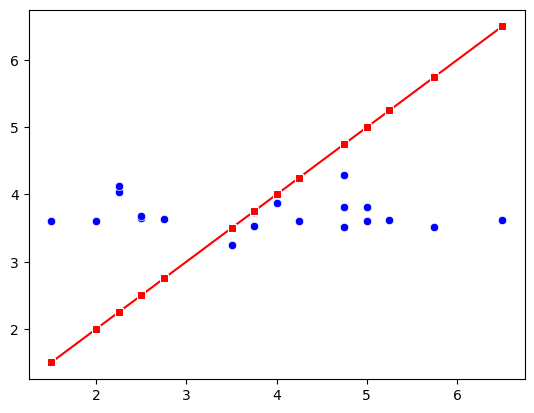

In [8]:
import seaborn  as sns
sns.lineplot(x=y_test.flatten(),y=y_test.flatten(),marker='s',color='r')
sns.scatterplot(x=y_test.flatten(),y=y_test_pred.flatten(),marker='o',color='b')
plt.show()

In [9]:
#Cách 3:Dùng residual plot
y_test_pred=model.predict(X_test)
dfTestValidation =pd.DataFrame(list(zip(X_test[:,0],X_test[:,1],
                                        y_test.flatten(),
                                        y_test_pred.flatten())),
                                        columns=['T5_test','T6_test','y_test','y_test_predicted'])
dfTestValidation['Residual']=dfTestValidation['y_test'] - dfTestValidation['y_test_predicted']
dfTestValidation

,T5_test,T6_test,y_test,y_test_predicted,Residual
0,8.5,8.3,3.75,3.745859,0.004141
1,5.8,3.7,4.75,4.285848,0.464152
2,6.8,9.0,3.50,3.251703,0.248297
3,4.0,5.5,5.75,3.517034,2.232966
4,8.6,8.1,4.75,3.811766,0.938234
5,5.3,6.1,2.75,3.631590,-0.881590
6,8.0,6.6,2.25,4.042582,-1.792582
7,5.4,6.6,3.75,3.535134,0.214866
8,7.1,7.7,2.00,3.611786,-1.611786
9,7.5,6.9,4.00,3.875412,0.124588


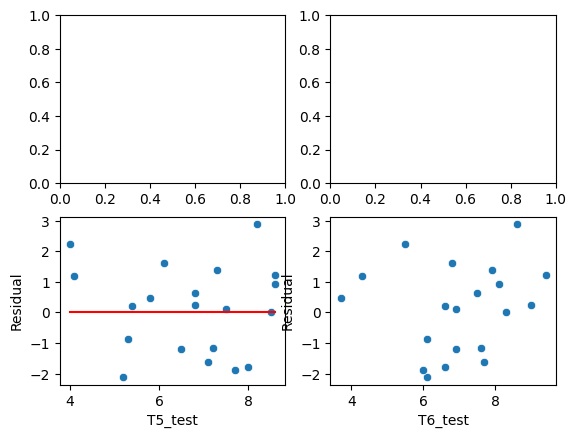

In [10]:
fig,axes=plt.subplots(2,2)
sns.scatterplot(data=dfTestValidation,x='T5_test',y='Residual',ax=axes[1,0])
sns.lineplot(data=dfTestValidation,x='T5_test',y=[0]*len(dfTestValidation),color='r',ax=axes[1,0])
sns.scatterplot(data=dfTestValidation,x='T6_test',y='Residual',ax=axes[1,1])
plt.show()

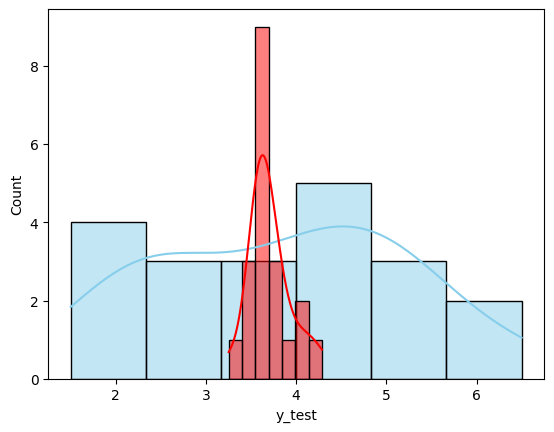

In [11]:
#cách 4:dùng histogram plot
sns.histplot(data=dfTestValidation,x='y_test',color="skyblue",label="Actual",kde=True)
sns.histplot(data=dfTestValidation,x='y_test_predicted',color="red",label="Forecast",kde=True)
plt.show()


In [12]:
y_train_pred=model.predict(X_train)
dfTestValidation =pd.DataFrame(list(zip(X_train[:,0],X_train[:,1],
                                        y_train.flatten(),
                                        y_train_pred.flatten())),
                                        columns=['T5_train','T6_train','y_train','y_train_predicted'])
dfTestValidation['Residual']=dfTestValidation['y_train'] - dfTestValidation['y_train_predicted']

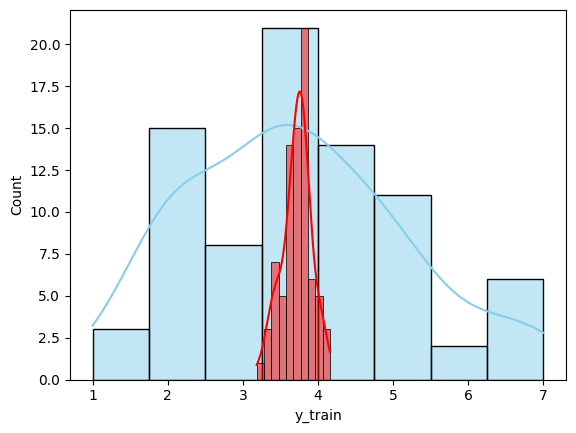

In [13]:
sns.histplot(data=dfTestValidation,x='y_train',color="skyblue",label="Actual",kde=True)
sns.histplot(data=dfTestValidation,x='y_train_predicted',color="red",label="Forecast",kde=True)
plt.show()

In [14]:
#Underfitting: Train có bias cao và tập test có bias cao
#Fitting: Train có bias thấp và tập test có bias thấp
#Overfitting: Train có variance cao và tập test có bias cao
#Mô hình máy học tốt : Bias thấp và variance thấp
#Bias thấp có nghĩa là lỗi thấp
#Variance thấp có nghĩa là sự chi tiết thấp(đa dạng thấp) hay sự tổng quát cao  

In [15]:
#Lưu trữ mô hình hồi quy xuống thiết bị
import pickle
pickle.dump(model,open('model_dubao_ngonngu.sv','wb'))

In [16]:
#xây dựng chương trình nhập điểm T5,T6 từ bàn phím
#Hãy dự báo điểm thi NGONNGU
import pickle
loaded_model=pickle.load(open('model_dubao_ngonngu.sv','rb'))
vT5=float(input("Nhập T5: "))
vT6=float(input('Nhập T6: '))

predicted_vLogic=loaded_model.predict([[vT5,vT6]])
print(f'Dự báo điểm thi NGONNGU là: {predicted_vLogic}')

Dự báo điểm thi NGONNGU là: [3.90172761]
